## Dependencies

In [1]:
import sys
import os
import matplotlib.pyplot as plt


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from utils import data_plot, estimate_mi, print_emi_output, compute_emi_evolution, emi_evolution_plot
from distributions import ContinuousGaussian, ContinuousUniform, Mixed, Discrete

#### Method to analize the mutual information for a given data distribution

Note that the analysis on the estimated mutual information (EMI) is performed using methods from the `utils` package.

In [2]:
available_distributions = {'continuous_gaussian' : ContinuousGaussian, 
                           'continuous_uniform' : ContinuousUniform, 
                           'mixed' : Mixed, 
                           'discrete' : Discrete}

def mi_analysis(distribution_name: str, parameter: float, n_symbols: int, continuous_noise: float, 
                discrete_shuffling: str, sample_size: int, seed: int) -> None:

    if not distribution_name in available_distributions:
        raise ImportError("Selected distribution is not available for analysis. Please use one from: continuous_gaussian, continuous_uniform, mixed, discrete")
    
    distribution = available_distributions[distribution_name](seed=seed)

    # Set distribution parameters
    distribution.set_parameter(
        parameter=parameter,
        n_symbols=n_symbols,
        continuous_noise=continuous_noise,
        discrete_shuffling=discrete_shuffling
    )

    # Generate sampĺes
    data = distribution.gen_data(sample_size)

    # Split samples in the random variables X and Y
    x = data[:, 0]
    y = data[:, 1]

    # Estimation of the mutual information
    post_emi, post_size, prev_emi, prev_size = estimate_mi(x=x, y=y)

    # Printing of the emi results in console
    print_emi_output(post_emi, post_size, prev_emi, prev_size)

    # Build and show the scatter-plot of X and Y
    splot: plt.Figure = data_plot(x=x, y=y, mode="scatter", alpha=0.3)
    splot.show()

    # Compute the emi and tree size evolution as the sample size increases
    emi_size_evolution = compute_emi_evolution(x=x, y=y, stride=1, show_tqdm=True)

    # Plots the evolution of the EMI
    evol_plot: plt.Figure = emi_evolution_plot(evolution_array=emi_size_evolution, plot_post_emi=True, plot_post_size=True,
                                            plot_prev_emi=True, plot_prev_size=True)
    evol_plot.show()

## Results for different distributions

### Continuous Bivariate Gaussian

Results of the estimation of mutual information (EMI)

Results previous of the tree regularization
Size: 64
EMI value: 0.183

Results after the tree regularization
Size: 45
EMI value: 0.149



 50%|█████     | 1006/2000 [00:05<00:05, 195.87it/s]


KeyboardInterrupt: 

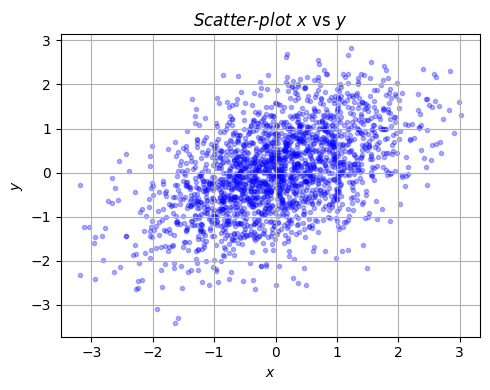

In [3]:
# Parameters of the distribution
distribution_name = 'continuous_gaussian'
sample_size = 2000
parameter = 0.5
n_symbols = None
continuous_noise = None
discrete_shuffling = None
seed = 42

mi_analysis(distribution_name=distribution_name, 
            parameter=parameter, n_symbols=n_symbols, 
            continuous_noise=continuous_noise, 
            discrete_shuffling=discrete_shuffling, 
            sample_size=sample_size,
            seed=seed)

### Continuous Uniform

In [ ]:
# Parameters of the distribution
distribution_name = 'continuous_uniform'
sample_size = 2000
parameter = 0.5
n_symbols = None
continuous_noise = None
discrete_shuffling = None
seed = 42

mi_analysis(distribution_name=distribution_name, 
            parameter=parameter, n_symbols=n_symbols, 
            continuous_noise=continuous_noise, 
            discrete_shuffling=discrete_shuffling, 
            sample_size=sample_size,
            seed=seed)

### Mixed

In [ ]:
# Parameters of the distribution
distribution_name = 'mixed'
sample_size = 2000
parameter = 0.5
n_symbols = 4
continuous_noise = 0.1
discrete_shuffling = 'fixed'
seed = 42

mi_analysis(distribution_name=distribution_name, 
            parameter=parameter, n_symbols=n_symbols, 
            continuous_noise=continuous_noise, 
            discrete_shuffling=discrete_shuffling, 
            sample_size=sample_size,
            seed=seed)

### Discrete

In [ ]:
# Parameters of the distribution
distribution_name = 'discrete'
sample_size = 2000
parameter = 0.5
n_symbols = 4
continuous_noise = 0.1
discrete_shuffling = 'fixed'
seed = 42

mi_analysis(distribution_name=distribution_name, 
            parameter=parameter, n_symbols=n_symbols, 
            continuous_noise=continuous_noise, 
            discrete_shuffling=discrete_shuffling, 
            sample_size=sample_size,
            seed=seed)